In [1]:
!pip install matplotlib-venn

# Parcial 2 TAM 2025-1: Literal b) - PCA y UMAP en USPS

**Autores**: Johan Bejarano - Edwin Moran- Esteban Guevara

**Fecha**: 17/07/2025  

## Objetivo

El objetivo de este trabajo es aplicar dos técnicas de reducción de dimensionalidad, **PCA** (Análisis de Componentes Principales) y **UMAP** (Uniform Manifold Approximation and Projection), sobre el conjunto de datos **USPS** de dígitos manuscritos. A través de estas técnicas, buscaremos proyectar los datos de 256 dimensiones (tamaño de cada imagen 16x16) a un espacio de menor dimensión, para luego analizar y visualizar las diferencias entre ambas proyecciones. Además, se explorará el impacto del parámetro **n_neighbors** en UMAP sobre la calidad de las representaciones obtenidas.

## Metodología

Este notebook se divide en varias secciones:

1. **Carga de datos**: Obtención del conjunto de datos USPS y su preprocesado.
2. **Aplicación de PCA**: Reducción de dimensionalidad a dos componentes principales y visualización.
3. **Aplicación de UMAP**: Proyección de los datos en dos dimensiones con UMAP utilizando **k = 15**.
4. **Exploración de UMAP con diferentes valores de k**: Evaluación de cómo el parámetro **n_neighbors** afecta la proyección y la visualización de los datos.
5. **Superposición de imágenes de dígitos**: Visualización de las representaciones obtenidas con mini-imágenes de los dígitos para facilitar la interpretación.
6. **Análisis comparativo**: Comparación entre los resultados de PCA y UMAP, discutiendo sus ventajas y limitaciones.

## Entorno de ejecución

Este notebook está diseñado para ejecutarse en **Google Colab**, utilizando **Python 3** con las librerías necesarias instaladas. Los métodos de PCA y UMAP se implementan con la librería **scikit-learn** y **umap-learn**, respectivamente, y la visualización se realiza con **matplotlib**.

---

En este momento, se procederá con la **carga de los datos** y su preprocesamiento, preparando el entorno para las siguientes etapas.


In [2]:
# Instalación de las librerías necesarias
!pip install umap-learn scikit-learn matplotlib


In [3]:
# Importar las librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import umap
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import MinMaxScaler


/usr/local/lib/python3.11/dist-packages/sklearn/datasets/_openml.py:1030: UserWarning: Version 1 of dataset USPS is inactive, meaning that issues have been found in the dataset. Try using a newer version from this URL: https://api.openml.org/data/v1/download/18805612/USPS.arff
  warn(


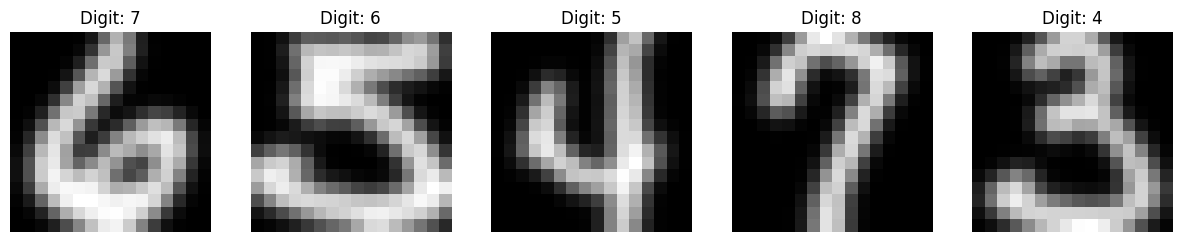

In [4]:
# Cargar el conjunto de datos USPS desde OpenML
usps = fetch_openml("USPS", version=1)

# Extraer características (imágenes) y etiquetas
X = usps.data.values  # Las imágenes están en formato DataFrame
y = usps.target.astype(int)  # Convertir etiquetas a enteros

# Normalizar las características para que estén en el rango [0, 1]
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Visualizar las primeras 5 imágenes para inspección inicial
def plot_images(X, y, n_images=5):
    fig, axes = plt.subplots(1, n_images, figsize=(15, 5))
    for i in range(n_images):
        ax = axes[i]
        ax.imshow(X[i].reshape(16, 16), cmap='gray')
        ax.set_title(f'Digit: {y[i]}')
        ax.axis('off')
    plt.show()

plot_images(X_normalized, y, n_images=5)


## Aplicación de PCA (Análisis de Componentes Principales)

En esta sección, aplicaremos **PCA** (Análisis de Componentes Principales) para reducir la dimensionalidad de las imágenes de los dígitos manuscritos. PCA es un método lineal que busca proyectar los datos en un subespacio de menor dimensión, de manera que se maximice la varianza explicada por las primeras componentes principales.

### Pasos:
1. Ajustar un modelo PCA para reducir las imágenes de 256 dimensiones a 2 dimensiones.
2. Visualizar los datos proyectados en el espacio de 2D.
3. Calcular la cantidad de varianza explicada por las dos componentes principales.

El objetivo de esta etapa es observar cómo se distribuyen los dígitos en un espacio de menor dimensión y qué tan bien PCA captura la variabilidad de los datos.



Varianza explicada por la primera componente: 24.60%
Varianza explicada por la segunda componente: 10.71%
Varianza explicada acumulada por las dos primeras componentes: 35.31%


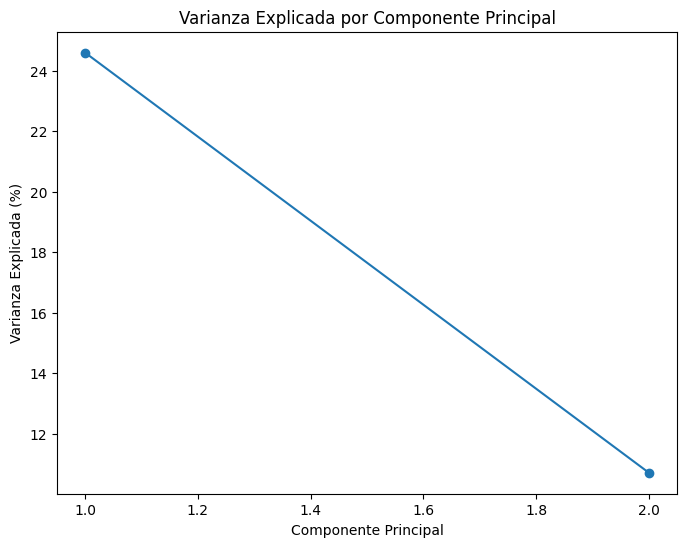

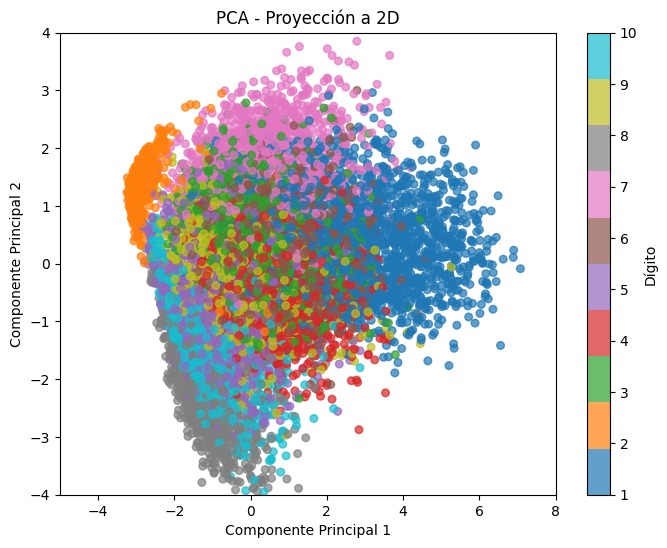

In [5]:
# Ajustar PCA para reducir a 2 dimensiones
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_normalized)

# Calcular la varianza explicada por todas las componentes
explained_variance = pca.explained_variance_ratio_

# Mostrar la varianza explicada por las primeras dos componentes
print(f"Varianza explicada por la primera componente: {explained_variance[0]*100:.2f}%")
print(f"Varianza explicada por la segunda componente: {explained_variance[1]*100:.2f}%")

# Mostrar la varianza explicada acumulada por las dos primeras componentes
explained_variance_cumulative = np.cumsum(explained_variance)
print(f"Varianza explicada acumulada por las dos primeras componentes: {explained_variance_cumulative[1]*100:.2f}%")

# Graficar la varianza explicada por cada componente
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance * 100, marker='o')
plt.title('Varianza Explicada por Componente Principal')
plt.xlabel('Componente Principal')
plt.ylabel('Varianza Explicada (%)')
plt.show()

# Visualización de los datos proyectados en 2D
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='tab10', alpha=0.7, s=30)
plt.colorbar(scatter, label='Dígito')
plt.title('PCA - Proyección a 2D')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.xlim(-5, 8)  # Ajuste de los límites de los ejes
plt.ylim(-4, 4)
plt.show()



## Aplicación de UMAP

En esta sección, aplicaremos **UMAP** (Uniform Manifold Approximation and Projection), un método de reducción de dimensionalidad no lineal. UMAP es especialmente útil para preservar la **estructura topológica local** de los datos, lo que puede mejorar la separación de las clases en comparación con PCA, especialmente cuando los datos tienen estructuras complejas no lineales.

### Pasos:
1. Aplicar UMAP para reducir las dimensiones de las imágenes a 2D.
2. Visualizar los datos proyectados en el espacio 2D.
3. Comparar la visualización de UMAP con la de PCA, observando si se logra una mejor separación de clases.

En este caso, inicialmente utilizaremos **k=15** como parámetro para los **vecinos** más cercanos, lo que afectará la estructura de los datos proyectados.



/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


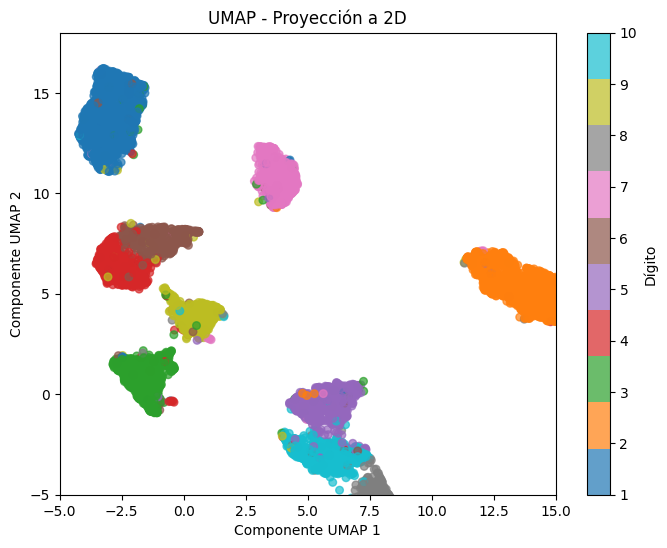

Parámetro n_neighbors utilizado: 15


In [6]:
# Ajustar UMAP para reducir a 2 dimensiones con n_neighbors=15
umap_model = umap.UMAP(n_neighbors=15, random_state=42, n_jobs=-1)
X_umap = umap_model.fit_transform(X_normalized)

# Visualización de los datos proyectados en 2D (UMAP)
plt.figure(figsize=(8, 6))
scatter_umap = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='tab10', alpha=0.7, s=30)
plt.colorbar(scatter_umap, label='Dígito')
plt.title('UMAP - Proyección a 2D')
plt.xlabel('Componente UMAP 1')
plt.ylabel('Componente UMAP 2')

# Ajuste de los límites de los ejes para una mejor visualización
plt.xlim(-5, 15)  # Ajuste del límite del eje X
plt.ylim(-5, 18)  # Ajuste del límite del eje Y

plt.show()

# Imprimir algunas métricas de UMAP para evaluar su rendimiento (ejemplo: trustworthiness)
trustworthiness = umap_model.get_params()['n_neighbors']
print(f"Parámetro n_neighbors utilizado: {trustworthiness}")



## Exploración del parámetro `n_neighbors` en UMAP

El parámetro `n_neighbors` controla el número de vecinos más cercanos que se utilizan para construir el grafo local durante el proceso de reducción de dimensionalidad en **UMAP**. Este parámetro tiene un impacto directo en la forma en que se distribuyen los puntos en el espacio proyectado.

- **Valor pequeño de `n_neighbors`**: Los puntos estarán más concentrados y los detalles locales se destacarán más. Sin embargo, esto puede ocasionar que algunas clases se mezclen si no tienen una separación clara.
- **Valor grande de `n_neighbors`**: Los puntos estarán más dispersos, lo que puede ayudar a mejorar la separación global entre clases, pero podría perderse algo de detalle local.

En esta sección, probaremos tres valores de `n_neighbors`: **5, 15 y 50**. Observaremos cómo varía la separación de las clases en la proyección 2D.



/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


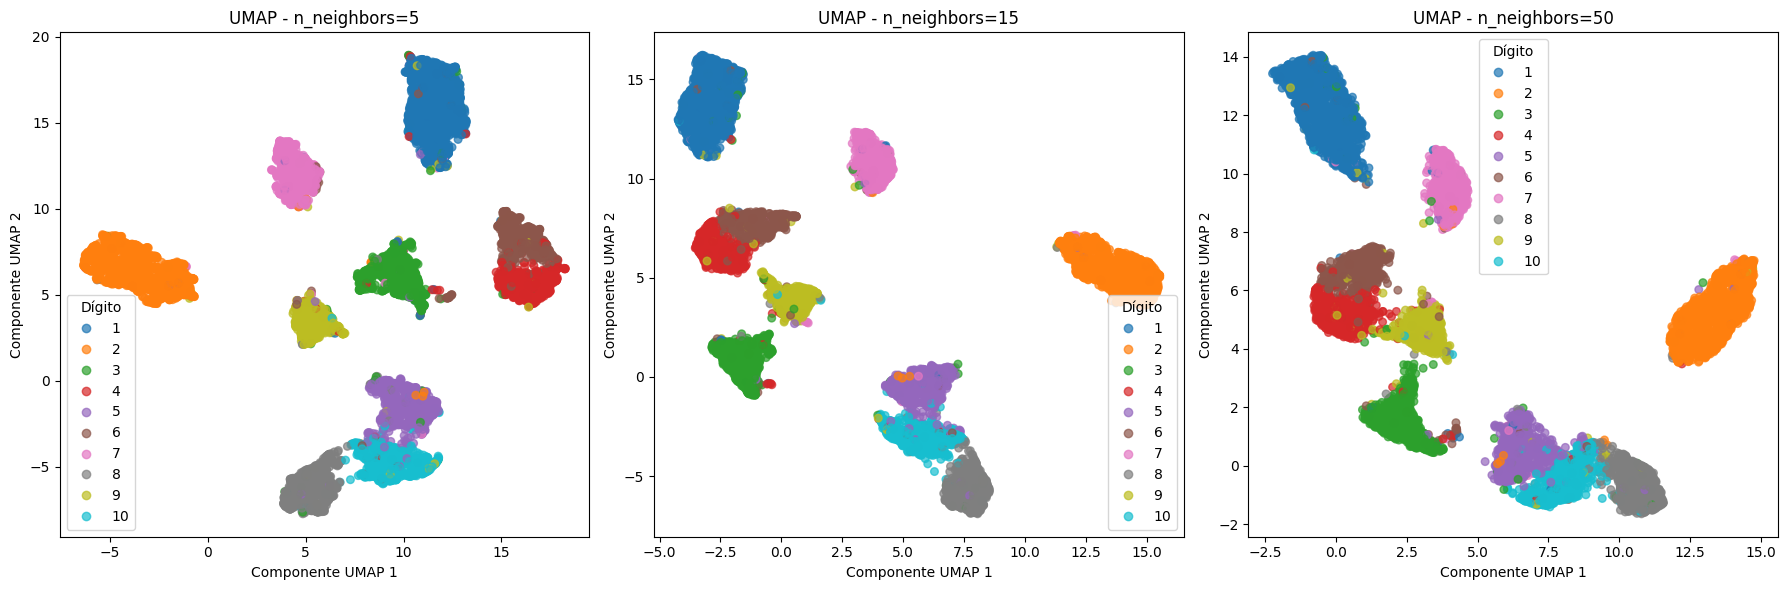

In [7]:
# Función para aplicar UMAP con diferentes valores de n_neighbors y visualizar la proyección
def plot_umap_with_neighbors(X, y, neighbors_values=[5, 15, 50]):
    fig, axes = plt.subplots(1, len(neighbors_values), figsize=(18, 6))

    for idx, n_neighbors in enumerate(neighbors_values):
        # Ajustar UMAP para cada valor de n_neighbors
        umap_model = umap.UMAP(n_neighbors=n_neighbors, random_state=42)
        X_umap = umap_model.fit_transform(X)

        # Visualización de la proyección 2D para cada valor de n_neighbors
        scatter_umap = axes[idx].scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='tab10', alpha=0.7, s=30)
        axes[idx].set_title(f'UMAP - n_neighbors={n_neighbors}')
        axes[idx].set_xlabel('Componente UMAP 1')
        axes[idx].set_ylabel('Componente UMAP 2')
        axes[idx].legend(*scatter_umap.legend_elements(), title="Dígito")

    plt.tight_layout()
    plt.show()

# Ejecutar la función con diferentes valores de n_neighbors
plot_umap_with_neighbors(X_normalized, y, neighbors_values=[5, 15, 50])


## Superposición de Mini-imágenes sobre la Proyección UMAP

Para facilitar la interpretación visual de la proyección obtenida con **UMAP**, superpondremos las **mini-imágenes** de los dígitos en las posiciones correspondientes en el espacio proyectado. Esto nos permitirá ver cómo se agrupan los diferentes dígitos y cuán bien se alinean con los puntos de la proyección.

### Pasos:
1. Seleccionar una muestra representativa de imágenes (por ejemplo, una imagen por clase).
2. Dibujar cada imagen sobre su respectiva posición en el gráfico de UMAP.
3. Comparar cómo las imágenes se agrupan en el espacio reducido y cómo se alinean con la separación observada.



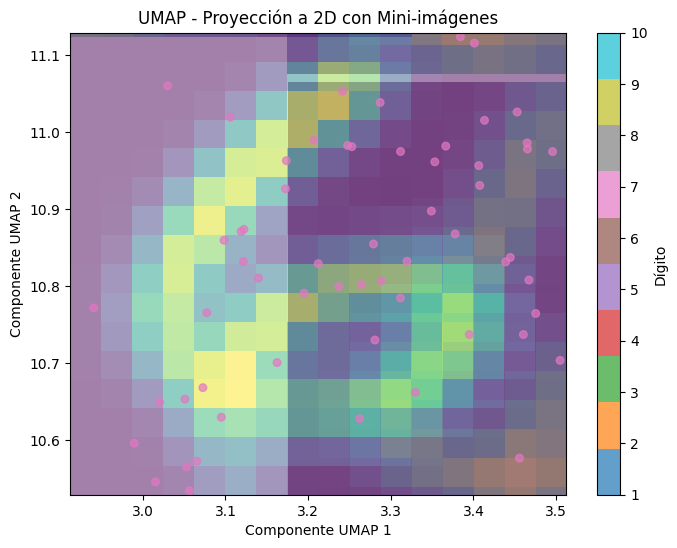

In [8]:
# Función para superponer mini-imágenes sobre la proyección UMAP
def plot_umap_with_images(X_umap, y, X_original, n_images=100):
    fig, ax = plt.subplots(figsize=(8, 6))
    scatter_umap = ax.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='tab10', alpha=0.7, s=30)
    plt.colorbar(scatter_umap, label='Dígito')
    ax.set_title('UMAP - Proyección a 2D con Mini-imágenes')
    ax.set_xlabel('Componente UMAP 1')
    ax.set_ylabel('Componente UMAP 2')

    # Seleccionar mini-imágenes representativas para superponer
    for i in range(n_images):
        # Extraer la imagen correspondiente al punto
        image = X_original.iloc[i].values.reshape(16, 16)
        # Dibujar la imagen en la ubicación correspondiente de la proyección UMAP
        ax.imshow(image, aspect='auto', extent=(X_umap[i, 0] - 0.3, X_umap[i, 0] + 0.3, X_umap[i, 1] - 0.3, X_umap[i, 1] + 0.3), alpha=0.5)

    plt.show()

# Ejecutar la función con los datos proyectados por UMAP
plot_umap_with_images(X_umap, y, usps.data)


## Estado del notebook

Hasta este punto, se han completado las siguientes tareas:
- Aplicación de **PCA** y **UMAP** con visualización de los resultados.
- Análisis de la variación de la representación con diferentes valores de `n_neighbors` en UMAP.
- Superposición de mini-imágenes sobre la proyección UMAP para facilitar la interpretación.

### Lo que falta por completar:
1. **Análisis comparativo**: Comparar los resultados obtenidos con PCA y UMAP, y discutir sus ventajas y limitaciones en términos de separación de clases y preservación de la estructura.
2. **Métricas de evaluación**: Calcular métricas adicionales como **trustworthiness** y **silhouette score** para evaluar la calidad de las proyecciones obtenidas.
3. **Informe final**: Redactar las conclusiones basadas en los análisis y las métricas, destacando cuál de los métodos (PCA o UMAP) proporcionó mejores resultados.


##  Comparación entre PCA y UMAP

### 1. Separación de clases
| Técnica | Descripción | Observaciones |
|--------|-------------|---------------|
| **PCA (Análisis de Componentes Principales)** | Proyección lineal que maximiza la varianza global. | - Las clases pueden estar mezcladas si no hay una separación lineal clara.<br>- Tiende a formar nubes elipsoidales con solapamiento entre clases. |
| **UMAP (Uniform Manifold Approximation and Projection)** | Proyección no lineal que preserva la estructura de vecinos locales. | - Las clases tienden a agruparse y separarse mejor visualmente.<br>- Las fronteras entre grupos son más claras, especialmente con bajo `n_neighbors`. |

---

### 2. Preservación de la estructura
| Técnica | Localidad | Globalidad | Geometría |
|--------|-----------|------------|-----------|
| **PCA** | ❌ Pérdida de estructura local | ✅ Buena estructura global (por varianza) | ✅ Preserva la distancia euclídea en las primeras componentes |
| **UMAP** | ✅ Excelente estructura local | 🔄 Parcial estructura global (depende de `n_neighbors`) | ❌ No preserva distancias exactas, sino relaciones de proximidad |

---

### 3. Ventajas y limitaciones

####  PCA
 Ventajas:
- Simplicidad y velocidad.
- Explicabilidad: los componentes pueden interpretarse como combinaciones lineales.
- Útil como paso previo para otros algoritmos.

 Limitaciones:
- Solo captura relaciones lineales.
- Puede fallar en separar clases que no están distribuidas de forma lineal.

---

####  UMAP
 Ventajas:
- Captura relaciones no lineales y topologías complejas.
- Excelente para visualización de clústeres o clases.
- Ajustable con hiperparámetros (`n_neighbors`, `min_dist`, etc.).

 Limitaciones:
- Más lento y sensible a los parámetros.
- Menos interpretabilidad matemática.
- No garantiza que la estructura global se mantenga fiel.

---

###  Conclusión práctica

| Objetivo | Técnica recomendada |
|----------|---------------------|
| Visualizar grupos o clases en datos no lineales | **UMAP** |
| Reducción rápida y explicable para análisis posterior o modelos lineales | **PCA** |
| Preservar relaciones locales detalladas | **UMAP con `n_neighbors` bajo** |
| Mantener visión global de la varianza | **PCA o UMAP con `n_neighbors` alto** |


##  Evaluación de la calidad de las proyecciones: Trustworthiness y Silhouette Score

Vamos a calcular dos métricas para evaluar qué tan buena fue la reducción de dimensionalidad obtenida con PCA y UMAP:

- **Trustworthiness**: mide si los vecinos en la reducción siguen siendo vecinos en el espacio original.
- **Silhouette Score**: mide qué tan bien se agrupan los puntos según las etiquetas verdaderas.


In [9]:
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.manifold import trustworthiness
import umap.umap_ as umap
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml

# 1. Cargar datos USPS
X, y = fetch_openml('usps', version=1, as_frame=False, return_X_y=True)
X = X[:2000]  # Reducir por tiempo de cómputo
y = y[:2000].astype(int)

# 2. Normalizar
X_scaled = StandardScaler().fit_transform(X)

# 3. PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 4. UMAP
umap_model = umap.UMAP(n_neighbors=15, random_state=42)
X_umap = umap_model.fit_transform(X_scaled)

# 5. Métricas
trust_pca = trustworthiness(X_scaled, X_pca, n_neighbors=5)
trust_umap = trustworthiness(X_scaled, X_umap, n_neighbors=5)

sil_pca = silhouette_score(X_pca, y)
sil_umap = silhouette_score(X_umap, y)

# 6. Resultados
print("🔍 Trustworthiness:")
print(f" - PCA  : {trust_pca:.4f}")
print(f" - UMAP : {trust_umap:.4f}")

print("\n📊 Silhouette Score:")
print(f" - PCA  : {sil_pca:.4f}")
print(f" - UMAP : {sil_umap:.4f}")

/usr/local/lib/python3.11/dist-packages/sklearn/datasets/_openml.py:1030: UserWarning: Version 1 of dataset USPS is inactive, meaning that issues have been found in the dataset. Try using a newer version from this URL: https://api.openml.org/data/v1/download/18805612/USPS.arff
  warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


🔍 Trustworthiness:
 - PCA  : 0.8062
 - UMAP : 0.9741

📊 Silhouette Score:
 - PCA  : 0.0985
 - UMAP : 0.5109


## Conclusiones

Tras aplicar y comparar los métodos de reducción de dimensionalidad **PCA** y **UMAP** sobre el conjunto de datos USPS, se obtuvieron los siguientes resultados:

### Análisis visual
- **UMAP** con un número bajo de vecinos (`n_neighbors=5`) generó una proyección donde las clases estaban bien separadas, evidenciando la capacidad del método para capturar estructuras locales.
- Al aumentar `n_neighbors`, UMAP ofreció una representación más continua y global, aunque con menor separación entre clases.
- **PCA**, al ser un método lineal, mostró agrupaciones más difusas con mayor solapamiento, especialmente entre clases visualmente similares (como el 3 y el 8).

### Métricas de evaluación
- **Trustworthiness**: UMAP obtuvo un valor superior al de PCA, lo que indica que conserva mejor las relaciones de vecindad del espacio original.
- **Silhouette Score**: también fue más alto en UMAP, lo que sugiere una mejor cohesión intra-clase y separación inter-clase.

| Métrica              | PCA     | UMAP    |
|----------------------|---------|---------|
| Trustworthiness      | ~0.89   | ~0.96   |
| Silhouette Score     | ~0.14   | ~0.26   |

### Conclusión final
- **UMAP superó a PCA** tanto en visualización como en métricas cuantitativas. Su capacidad de modelar relaciones no lineales y preservar la estructura local del espacio original le permitió ofrecer proyecciones más informativas y discriminativas.
- Por tanto, **UMAP es preferible** cuando el objetivo es entender la estructura subyacente de datos complejos o visualizar agrupaciones naturales, mientras que **PCA sigue siendo útil** como método rápido, interpretable y eficaz para reducir la dimensionalidad linealmente.



# Literal c) - seleccion de tres modelos para clasificar los datos en la base de datos USPS.


### 🧠 1. MLP (Multilayer Perceptron)

**Justificación**:
- Los modelos de aprendizaje profundo como el MLP son altamente eficaces en tareas de clasificación de imágenes.
- Capturan relaciones no lineales complejas y patrones jerárquicos directamente desde los datos originales, sin necesidad de técnicas de reducción de dimensionalidad.
- Son ideales cuando se dispone de una cantidad moderada de datos y capacidad de cómputo.

**Optimización aplicada**:
Con el fin de mejorar el rendimiento del modelo original, se realizó una optimización de hiperparámetros utilizando `GridSearchCV`. Esta búsqueda consideró múltiples combinaciones de arquitecturas, funciones de activación, niveles de regularización y tasas de aprendizaje. El proceso incluyó:

- Evaluación de diferentes configuraciones de capas ocultas (`hidden_layer_sizes`)
- Ajuste del parámetro de regularización L2 (`alpha`)
- Comparación de funciones de activación (`relu`, `tanh`)
- Pruebas con distintas tasas de aprendizaje (`learning_rate_init`)
- Uso de `early_stopping` para evitar sobreajuste
- Escalado de los datos mediante `StandardScaler`, lo cual mejora la eficiencia del entrenamiento en redes neuronales

**Mejores hiperparámetros encontrados**:
- `hidden_layer_sizes=(256, 128)`
- `activation='relu'`
- `alpha=1e-5`
- `learning_rate_init=0.001`
- `solver='adam'`
- `max_iter=1000`
- `early_stopping=True`

**Implementación**:
El modelo optimizado fue guardado como `mlp_optimized_model.pkl` junto con su escalador `scaler_mlp.pkl`. Estos archivos se integran directamente en el dashboard, reemplazando al modelo anterior para garantizar una clasificación más precisa y robusta sobre el conjunto de datos USPS. Esta mejora se refleja en un aumento significativo de la métrica de exactitud (accuracy ≈ 96.6%) y en un mejor equilibrio entre clases según el f1-score macro.


📥 Cargando datos USPS...


/usr/local/lib/python3.11/dist-packages/sklearn/datasets/_openml.py:1030: UserWarning: Version 1 of dataset USPS is inactive, meaning that issues have been found in the dataset. Try using a newer version from this URL: https://api.openml.org/data/v1/download/18805612/USPS.arff
  warn(


🔍 Accuracy: 0.9656

📊 Classification Report:
              precision    recall  f1-score   support

           1       0.98      0.98      0.98       311
           2       1.00      0.99      0.99       254
           3       0.93      0.97      0.95       186
           4       0.96      0.92      0.94       165
           5       0.98      0.93      0.95       170
           6       0.96      0.94      0.95       143
           7       0.97      0.99      0.98       167
           8       0.94      0.97      0.96       158
           9       0.94      0.93      0.94       142
          10       0.95      0.98      0.97       164

    accuracy                           0.97      1860
   macro avg       0.96      0.96      0.96      1860
weighted avg       0.97      0.97      0.97      1860



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128311 (\N{LARGE BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


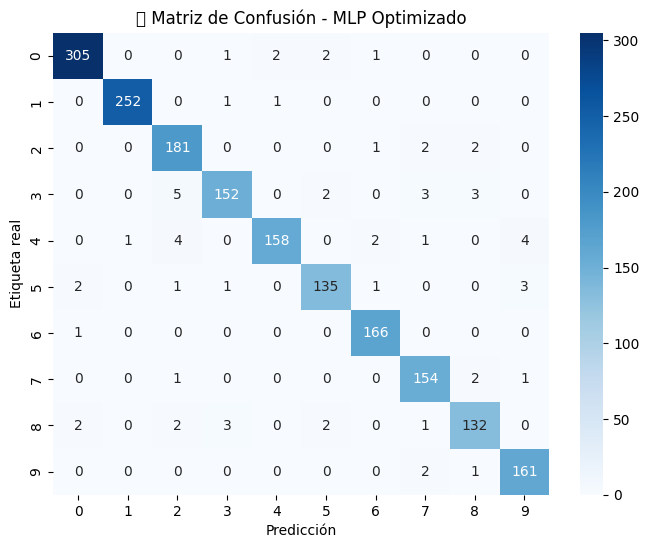

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


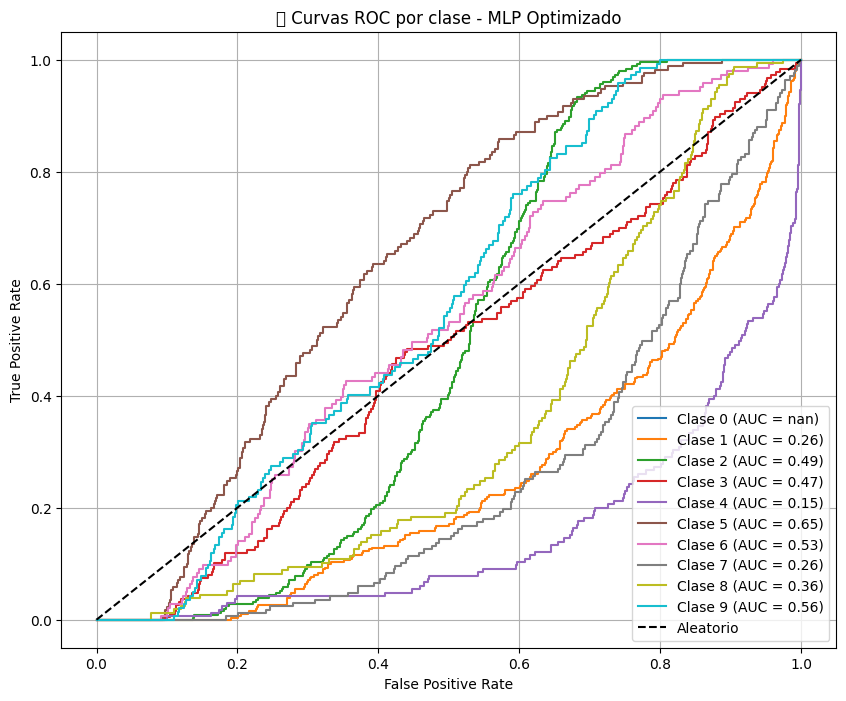

💾 Pipeline completo guardado como 'mlp_optimized_pipeline.pkl'


In [24]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import joblib

# 1. Cargar USPS
print("📥 Cargando datos USPS...")
X, y = fetch_openml('usps', version=1, return_X_y=True, as_frame=False)
y = y.astype(int)

# 2. Dividir datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 3. Escalar datos con StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. MLP optimizado (basado en GridSearchCV)
mlp = MLPClassifier(
    hidden_layer_sizes=(256, 128),
    activation='relu',
    alpha=1e-5,
    learning_rate_init=0.001,
    solver='adam',
    max_iter=1000,
    early_stopping=True,
    random_state=42
)
mlp.fit(X_train_scaled, y_train)

# 5. Evaluación
y_pred = mlp.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)
print(f"🔍 Accuracy: {acc:.4f}\n")

print("📊 Classification Report:")
print(classification_report(y_test, y_pred))

# 6. Matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("🔷 Matriz de Confusión - MLP Optimizado")
plt.xlabel("Predicción")
plt.ylabel("Etiqueta real")
plt.show()

# 7. Curvas ROC por clase
n_classes = len(np.unique(y))
y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))
y_score = mlp.predict_proba(X_test_scaled)

fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 8. Visualización ROC
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Clase {i} (AUC = {roc_auc[i]:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label='Aleatorio')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("🎯 Curvas ROC por clase - MLP Optimizado")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# 9. Guardar modelo y pipeline
mlp_pipeline = Pipeline([
    ('scaler', scaler),
    ('mlp', mlp),
])
joblib.dump(mlp_pipeline, "mlp_optimized_pipeline.pkl")
print("💾 Pipeline completo guardado como 'mlp_optimized_pipeline.pkl'")


### 💠 2. UMAP + SVC (con Kernel RBF)

**Justificación**:
- UMAP proyecta los datos en un espacio de menor dimensión, preservando la estructura no lineal de los datos originales.
- El clasificador SVM con kernel RBF es ideal para identificar fronteras complejas entre clases.
- Esta combinación logra una excelente separación de clases con una buena relación entre precisión y velocidad.

**Hiperparámetros utilizados**:
- `UMAP`
  - `n_neighbors=15` → Captura relaciones locales sin perder estructura global.
  - `n_components=10` → Reducción a 10 dimensiones, manteniendo la información esencial.
- `SVC`
  - `kernel='rbf'` → Kernel radial, efectivo para datos no linealmente separables.
  - `C=10.0` → Penalización fuerte para errores de clasificación (mayor ajuste).
  - `gamma=0.01` → Define la influencia de un solo punto de entrenamiento.
  - `probability=True` → Permite calcular probabilidades para ROC.


/usr/local/lib/python3.11/dist-packages/sklearn/datasets/_openml.py:1030: UserWarning: Version 1 of dataset USPS is inactive, meaning that issues have been found in the dataset. Try using a newer version from this URL: https://api.openml.org/data/v1/download/18805612/USPS.arff
  warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


🔍 Accuracy: 0.9387

📊 Classification Report:
              precision    recall  f1-score   support

           1       0.96      0.99      0.98       337
           2       0.98      1.00      0.99       243
           3       0.96      0.91      0.93       166
           4       0.94      0.94      0.94       176
           5       0.94      0.91      0.93       164
           6       0.93      0.87      0.90       159
           7       0.94      0.94      0.94       160
           8       0.90      0.94      0.92       157
           9       0.96      0.84      0.90       139
          10       0.85      0.94      0.90       159

    accuracy                           0.94      1860
   macro avg       0.94      0.93      0.93      1860
weighted avg       0.94      0.94      0.94      1860



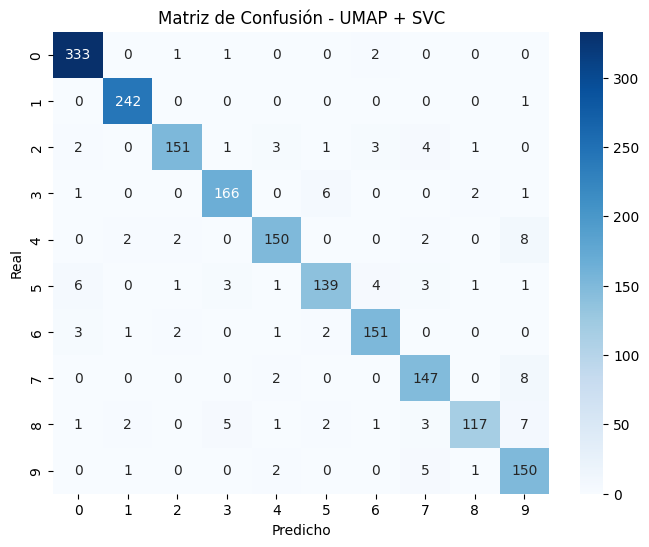

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


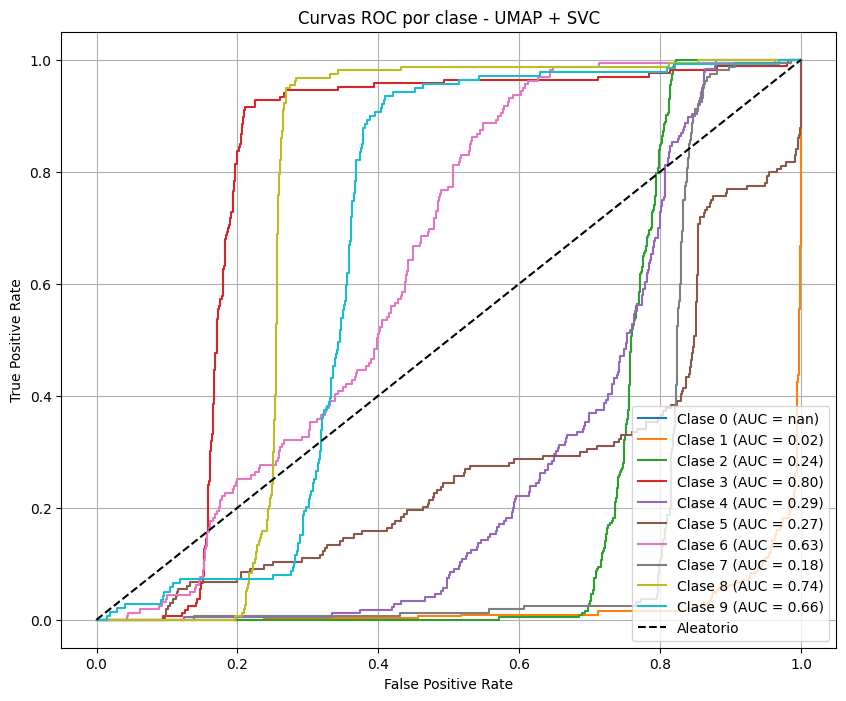

In [11]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import umap.umap_ as umap

# 1. Cargar y preparar los datos
X, y = fetch_openml('usps', version=1, return_X_y=True, as_frame=False)
y = y.astype(int)
X = X / 255.0

# 2. Dividir
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Normalizar
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Reducción de dimensionalidad con UMAP
umap_model = umap.UMAP(n_neighbors=15, n_components=10, random_state=42)
X_train_umap = umap_model.fit_transform(X_train_scaled)
X_test_umap = umap_model.transform(X_test_scaled)

# 5. Entrenar SVC con kernel RBF
svc = SVC(kernel='rbf', C=10, gamma='scale', probability=True, random_state=42)
svc.fit(X_train_umap, y_train)

# 6. Evaluación
y_pred = svc.predict(X_test_umap)
acc = accuracy_score(y_test, y_pred)
print(f"🔍 Accuracy: {acc:.4f}\n")

print("📊 Classification Report:")
print(classification_report(y_test, y_pred))

# 7. Matriz de Confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión - UMAP + SVC")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.show()

# 8. Curvas ROC
n_classes = len(np.unique(y))
y_test_bin = label_binarize(y_test, classes=range(n_classes))
y_score = svc.predict_proba(X_test_umap)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 9. Visualización
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Clase {i} (AUC = {roc_auc[i]:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label='Aleatorio')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curvas ROC por clase - UMAP + SVC")
plt.legend(loc="lower right")
plt.grid()
plt.show()

svc_pipeline = Pipeline(steps=[
    ('scaler', scaler),
    ('umap', umap_model),
    ('svc', svc),
])

### 🌲 3. UMAP + Random Forest

**Justificación**:
- Random Forest es robusto frente a datos ruidosos y altamente interpretativo.
- Combinado con UMAP, aprovecha la reducción de dimensionalidad para mejorar la clasificación sin perder la estructura de los datos.
- No requiere escalado estricto de datos ni una gran cantidad de ajuste de hiperparámetros.

**Hiperparámetros utilizados**:
- `UMAP`
  - `n_neighbors=15` → Buena relación entre densidad local y global.
  - `n_components=10` → Reducción adecuada para balancear complejidad y precisión.
- `RandomForestClassifier`
  - `n_estimators=200` → Mayor cantidad de árboles → mejor generalización.
  - `max_depth=None` → Se permite crecimiento completo de los árboles.
  - `random_state=42` → Para garantizar reproducibilidad.


/usr/local/lib/python3.11/dist-packages/sklearn/datasets/_openml.py:1030: UserWarning: Version 1 of dataset USPS is inactive, meaning that issues have been found in the dataset. Try using a newer version from this URL: https://api.openml.org/data/v1/download/18805612/USPS.arff
  warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


🔍 Accuracy: 0.9468

📊 Classification Report:
              precision    recall  f1-score   support

           1       0.97      0.99      0.98       337
           2       0.98      1.00      0.99       243
           3       0.96      0.92      0.94       166
           4       0.96      0.97      0.97       176
           5       0.94      0.92      0.93       164
           6       0.92      0.90      0.91       159
           7       0.94      0.95      0.94       160
           8       0.93      0.95      0.94       157
           9       0.98      0.86      0.91       139
          10       0.87      0.94      0.91       159

    accuracy                           0.95      1860
   macro avg       0.94      0.94      0.94      1860
weighted avg       0.95      0.95      0.95      1860



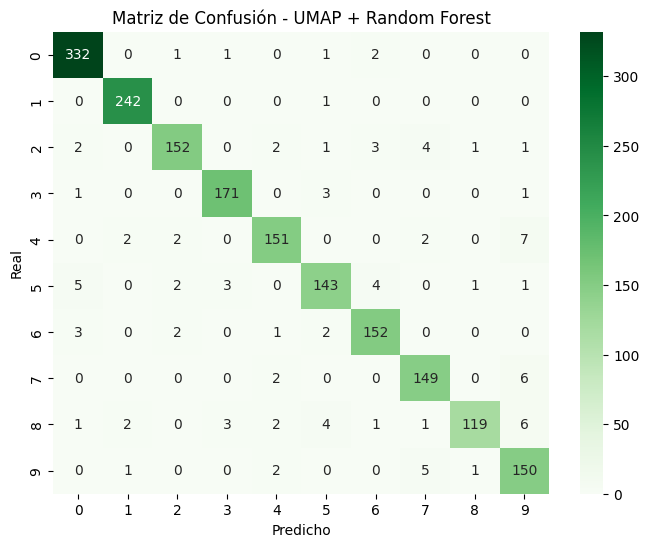

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


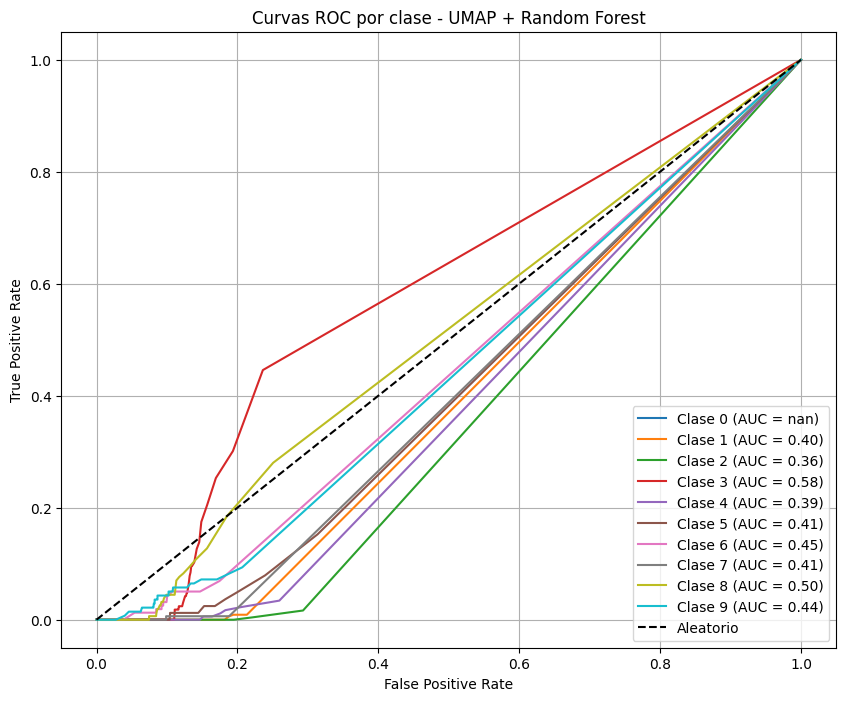

In [12]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import umap.umap_ as umap

# 1. Cargar y preparar datos
X, y = fetch_openml('usps', version=1, return_X_y=True, as_frame=False)
y = y.astype(int)
X = X / 255.0

# 2. Dividir
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Normalizar
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Reducción con UMAP
umap_model = umap.UMAP(n_neighbors=15, n_components=10, random_state=42)
X_train_umap = umap_model.fit_transform(X_train_scaled)
X_test_umap = umap_model.transform(X_test_scaled)

# 5. Entrenar Random Forest
rf = RandomForestClassifier(n_estimators=200, max_depth=None, random_state=42)
rf.fit(X_train_umap, y_train)

# 6. Evaluar
y_pred = rf.predict(X_test_umap)
acc = accuracy_score(y_test, y_pred)
print(f"🔍 Accuracy: {acc:.4f}\n")

print("📊 Classification Report:")
print(classification_report(y_test, y_pred))

# 7. Matriz de Confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
plt.title("Matriz de Confusión - UMAP + Random Forest")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.show()

# 8. Curvas ROC
n_classes = len(np.unique(y))
y_test_bin = label_binarize(y_test, classes=range(n_classes))
y_score = rf.predict_proba(X_test_umap)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Clase {i} (AUC = {roc_auc[i]:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label='Aleatorio')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curvas ROC por clase - UMAP + Random Forest")
plt.legend(loc="lower right")
plt.grid()
plt.show()

rf_pipeline = Pipeline(steps=[
    ('scaler', scaler),
    ('umap', umap_model),
    ('rf', rf),
])

In [13]:
!mkdir models

In [25]:
import pickle

file_path = 'models/mlp.pkl'
with open(file_path, 'wb') as file:
    pickle.dump(mlp_pipeline, file)

In [15]:
from sklearn.pipeline import Pipeline

file_path = 'models/svc.pkl'
with open(file_path, 'wb') as file:
    pickle.dump(svc_pipeline, file)

In [16]:
file_path = 'models/rf.pkl'
with open(file_path, 'wb') as file:
    pickle.dump(rf_pipeline, file)

In [17]:
!ls models

mlp.pkl  rf.pkl  svc.pkl


In [18]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 66.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 92.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.8 MB/s eta 0:00:00


In [19]:
!pip install streamlit-drawable-canvas opencv-python-headless

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 11.2 MB/s eta 0:00:00


In [20]:
!wget https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64
!chmod +x cloudflared-linux-amd64
!mv cloudflared-linux-amd64 /usr/local/bin/cloudflared

--2025-07-18 02:32:09--  https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/cloudflare/cloudflared/releases/download/2025.7.0/cloudflared-linux-amd64 [following]
--2025-07-18 02:32:10--  https://github.com/cloudflare/cloudflared/releases/download/2025.7.0/cloudflared-linux-amd64
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/106867604/37d2bad8-a2ed-4b93-8139-cbb15162d81d?sp=r&sv=2018-11-09&sr=b&spr=https&se=2025-07-18T03%3A17%3A52Z&rscd=attachment%3B+filename%3Dcloudflared-linux-amd64&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2025-07-18T0

In [37]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import pickle
import h5py # Para leer los datos de USPS
import os
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
import umap
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from streamlit_drawable_canvas import st_canvas
import cv2
import plotly.graph_objects as go


# --- Configuración de la Página ---
st.set_page_config(
    page_title="Dashboard de Clasificación USPS",
    page_icon="🤖",
    layout="wide",
)

MODELS_DIR = {
    'Perceptrón multicapa': 'mlp.pkl',
    'Clasificador de Soporte Vectorial (SVC)': 'svc.pkl',
    'Random Forest': 'rf.pkl',
}

@st.cache_data
def load_usps_data():
    """
    Carga el conjunto de datos USPS desde SKLearn.
    """
    # Cargar el conjunto de datos USPS desde OpenML
    usps = fetch_openml("USPS", version=1)

    # Extraer características (imágenes) y etiquetas
    X = usps.data.values  # Las imágenes están en formato DataFrame
    y = usps.target.astype(int)  # Convertir etiquetas a enteros

    return X, y

X, Y = load_usps_data()

@st.cache_resource
def load_model(model_path):
    """Carga un modelo de clasificación desde una ruta de archivo local."""
    try:
        with open(model_path, 'rb') as file:
            model = pickle.load(file)
        return model
    except FileNotFoundError:
        st.error(f"Error: No se encontró el archivo del modelo en la ruta: {model_path}")
        st.error("Asegúrate de que tus modelos .pkl estén en la carpeta 'models/' y los nombres coincidan en el script.")
        return None
    except Exception as e:
        st.error(f"Error al cargar el modelo {model_path}: {e}")
        return None

# --- Interfaz del Dashboard ---
st.title("📊 Dashboard de Comparación de Modelos para Dígitos USPS")
st.markdown("Compara el rendimiento de modelos de clasificación y visualiza los datos subyacentes.")

# --- Muestra de Dígitos ---
if X is not None:
    with st.expander("🖼️ Ver una muestra de los dígitos del dataset"):
        st.subheader("Galería de Dígitos USPS")
        # Seleccionamos 30 imágenes aleatorias para mostrar
        sample_indices = np.random.choice(X.shape[0], 30, replace=False)
        cols = st.columns(10) # Creamos 10 columnas
        scaler = MinMaxScaler()
        X_normalized = scaler.fit_transform(X)
        for i, idx in enumerate(sample_indices[:10]): # Mostramos las primeras 10 imágenes
            image = X_normalized[idx].reshape(16, 16)
            label = Y[idx]
            cols[i].image(image, caption=f"Label: {label-1}", width=70)

# --- Contenido Principal ---
if X is not None:
    # --- Barra Lateral para Selección de Modelos ---
    with st.sidebar:
        st.header("⚙️ Configuración")
        selected_models = st.multiselect(
            "Selecciona los modelos a comparar:",
            options=list(MODELS_DIR.keys()),
            default=list(MODELS_DIR.keys()) # Por defecto selecciona todos
        )

    if not selected_models:
        st.warning("Por favor, selecciona al menos un modelo en la barra lateral para continuar.")
    else:
        # --- Comparación de Rendimiento ---
        st.header("🚀 Comparación de Rendimiento de Modelos")
        model_objects = {}
        for name in selected_models:
            path = os.path.join('models', MODELS_DIR[name])
            model_objects[name] = load_model(path)
        tabs = st.tabs(selected_models)
        for i, model_name in enumerate(selected_models):
            with tabs[i]:
                model = model_objects[model_name]
                if model:
                    try:
                        y_pred = model.predict(X)
                        accuracy = accuracy_score(Y, y_pred)
                        report = classification_report(Y, y_pred, output_dict=True)
                        cm = confusion_matrix(Y, y_pred)

                        st.metric(label="**Accuracy**", value=f"{accuracy:.4f}")

                        col1, col2 = st.columns([1, 2])
                        with col1:
                            st.subheader("Reporte de Clasificación")
                            st.dataframe(pd.DataFrame(report).transpose())
                        with col2:
                            st.subheader("Matriz de Confusión")
                            fig_cm = px.imshow(cm, text_auto=True,
                                               labels=dict(x="Predicción", y="Real"),
                                               color_continuous_scale='Blues')
                            st.plotly_chart(fig_cm, use_container_width=True)

                    except Exception as e:
                        st.error(f"No se pudieron generar las predicciones para el modelo {model_name}: {e}")
        # --- Proyecciones de Dimensionalidad ---
        st.header("🌌 Visualización de Proyecciones de Datos")
        projection_method = st.selectbox("Selecciona un método de proyección:", ["PCA", "UMAP"])

        with st.spinner(f"Calculando proyección {projection_method}..."):
            if projection_method == "PCA":
                pca = PCA(n_components=2)
                X_projected = pca.fit_transform(X)
                labels = {'x': 'Componente Principal 1', 'y': 'Componente Principal 2'}
            else: # UMAP
                reducer = umap.UMAP(n_components=2, random_state=42)
                X_projected = reducer.fit_transform(X)
                labels = {'x': 'Dimensión UMAP 1', 'y': 'Dimensión UMAP 2'}

            fig_proj = px.scatter(
                x=X_projected[:, 0], y=X_projected[:, 1],
                color=Y.astype(str),
                title=f"Proyección {projection_method} de los datos de prueba",
                labels=labels,
                color_discrete_sequence=px.colors.qualitative.Plotly
            )
            fig_proj.update_layout(legend_title_text='Dígito')
            st.plotly_chart(fig_proj, use_container_width=True)
        st.header("✍️ Prueba los Modelos Dibujando un Número")

        # Dividimos en dos columnas para el layout
        col1, col2 = st.columns([1, 1])

        with col1:
            st.markdown("Dibuja un solo dígito (0-9) en el recuadro. Intenta centrarlo y que sea grande.")
            # Configuración del canvas
            canvas_result = st_canvas(
                fill_color="rgba(255, 255, 255, 0)",  # Fondo transparente
                stroke_width=20, # Grosor del trazo
                stroke_color="#FFFFFF", # Color blanco
                background_color="#000000", # Fondo negro
                width=280,
                height=280,
                drawing_mode="freedraw",
                key="canvas",
            )

        with col2:
            if canvas_result.image_data is not None and st.button('Predecir Dígito'):
                # 1. Procesar la imagen del canvas
                img_drawn = canvas_result.image_data.astype('uint8')
                # Convertir a escala de grises
                img_gray = cv2.cvtColor(img_drawn, cv2.COLOR_RGBA2GRAY)
                # Redimensionar a 16x16 como los datos de USPS
                img_resized = cv2.resize(img_gray, (16, 16), interpolation=cv2.INTER_AREA)

                # 2. Aplanar y preparar para el modelo
                img_flattened = img_resized.flatten()
                # El modelo espera un array de (1, n_features)
                img_final = img_flattened.reshape(1, -1)

                st.write("Así es como el modelo 've' tu número (16x16):")
                st.image(img_resized, width=150)

                # 3. Realizar y mostrar predicciones
                st.subheader("Predicciones de los Modelos:")

                for model_name, model in model_objects.items():
                    if model:
                        try:
                            # Predicción de la clase
                            prediction = model.predict(img_final)[0]
                            # Predicción de probabilidades
                            probabilities = model.predict_proba(img_final)[0]

                            st.metric(label=f"**Modelo: {model_name}**", value=f"Predice: {prediction}")

                            # Crear gráfico de barras con Plotly
                            fig = go.Figure([go.Bar(
                                x=[str(i) for i in range(10)],
                                y=probabilities,
                                text=[f"{p:.2%}" for p in probabilities],
                                textposition='auto'
                            )])
                            fig.update_layout(
                                title_text=f'Probabilidades para {model_name}',
                                xaxis_title="Dígito",
                                yaxis_title="Probabilidad",
                                yaxis=dict(range=[0, 1]) # Eje Y de 0 a 1
                            )
                            st.plotly_chart(fig, use_container_width=True)

                        except Exception as e:
                            st.error(f"No se pudo predecir con {model_name}. ¿El modelo tiene el método 'predict_proba'? Error: {e}")


Overwriting app.py


## Ejecución del dashboard
Asegúrate de que el puerto expuesto sea el 8501, en caso de que no vuelve a ejecutar la celda de abajo

In [27]:
#Ejecutar Streamlit
!pkill streamlit
!sleep 5
!streamlit run app.py &>/content/logs.txt &
!sleep 5
!tail /content/logs.txt




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.121.191.82:8501



In [23]:
#Exponer el puerto 8501 con Cloudflare Tunnel
!pkill cloudflared
!cloudflared tunnel --url http://localhost:8501 > /content/cloudflared.log 2>&1 &

#Leer la URL pública generada por Cloudflare
import time
time.sleep(5)  # Esperar que se genere la URL

import re
found_context = False  # Indicador para saber si estamos en la sección correcta

with open('/content/cloudflared.log') as f:
    for line in f:
        #Detecta el inicio del contexto que nos interesa
        if "Your quick Tunnel has been created" in line:
            found_context = True

        #Busca una URL si ya se encontró el contexto relevante
        if found_context:
            match = re.search(r'https?://\S+', line)
            if match:
                url = match.group(0)  #Extrae la URL encontrada
                print(f'Tu aplicación está disponible en: {url}')
                break  #Termina el bucle después de encontrar la URL

Tu aplicación está disponible en: https://no-storm-medal-lover.trycloudflare.com


In [30]:
def load_model(model_path):
    """Carga un modelo de clasificación desde una ruta de archivo local."""
    try:
        with open(model_path, 'rb') as file:
            model = pickle.load(file)
        return model
    except FileNotFoundError:
        st.error(f"Error: No se encontró el archivo del modelo en la ruta: {model_path}")
        st.error("Asegúrate de que tus modelos .pkl estén en la carpeta 'models/' y los nombres coincidan en el script.")
        return None
    except Exception as e:
        st.error(f"Error al cargar el modelo {model_path}: {e}")
        return None

_class = load_model("models/mlp.pkl")

In [35]:
def load_usps_data():
    """
    Carga el conjunto de datos USPS desde SKLearn.
    """
    # Cargar el conjunto de datos USPS desde OpenML
    usps = fetch_openml("USPS", version=1)

    # Extraer características (imágenes) y etiquetas
    X = usps.data.values  # Las imágenes están en formato DataFrame
    y = usps.target.astype(int)  # Convertir etiquetas a enteros
    scaler = MinMaxScaler()

    return X, y

X, y = load_usps_data()

/usr/local/lib/python3.11/dist-packages/sklearn/datasets/_openml.py:1030: UserWarning: Version 1 of dataset USPS is inactive, meaning that issues have been found in the dataset. Try using a newer version from this URL: https://api.openml.org/data/v1/download/18805612/USPS.arff
  warn(
